In [1]:
%matplotlib inline

In [2]:
import pandas
import matplotlib.pyplot as plt

In [3]:
confirmed = pandas.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv")
deaths = pandas.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv")

Text(0, 0.5, 'New Confirmed')

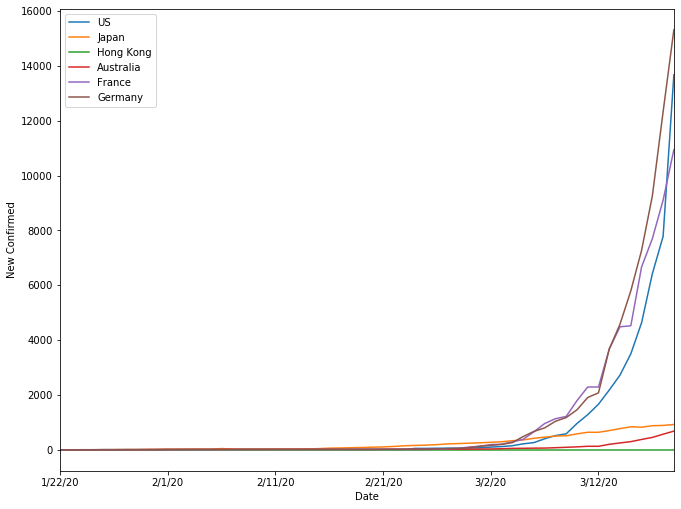

In [4]:
plt.figure(figsize=(11, 8.5))
confirmed[confirmed["Country/Region"]=="US"].sum()['1/22/20':confirmed.columns[-1]].plot(label="US")
confirmed[confirmed["Country/Region"]=="Japan"].sum()['1/22/20':confirmed.columns[-1]].plot(label="Japan")
confirmed[confirmed["Country/Region"]=="Hong Kong"].sum()['1/22/20':confirmed.columns[-1]].plot(label="Hong Kong")
confirmed[confirmed["Country/Region"]=="Australia"].sum()['1/22/20':confirmed.columns[-1]].plot(label="Australia")
# confirmed[confirmed["Country/Region"]=="Italy"].sum()['1/22/20':confirmed.columns[-1]].plot(label="Italy")
# confirmed[confirmed["Country/Region"]=="South Korea"].sum()['1/22/20':confirmed.columns[-1]].plot(label="South Korea")
# confirmed[confirmed["Country/Region"]=="Iran"].sum()['1/22/20':confirmed.columns[-1]].plot(label="Iran")
confirmed[confirmed["Country/Region"]=="France"].sum()['1/22/20':confirmed.columns[-1]].plot(label="France")
confirmed[confirmed["Country/Region"]=="Germany"].sum()['1/22/20':confirmed.columns[-1]].plot(label="Germany")
plt.legend()
plt.xlabel("Date")
plt.ylabel("New Confirmed")

In [5]:
confirmed[confirmed["Country/Region"]=="US"]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20
98,Washington,US,47.4009,-121.4905,0,0,0,0,0,0,...,267,366,442,568,572,643,904,1076,1014,1376
99,New York,US,42.1657,-74.9481,0,0,0,0,0,0,...,173,220,328,421,525,732,967,1706,2495,5365
100,California,US,36.1162,-119.6816,0,0,0,0,0,0,...,144,177,221,282,340,426,557,698,751,952
101,Massachusetts,US,42.2302,-71.5301,0,0,0,0,0,0,...,92,95,108,123,138,164,197,218,218,328
102,Diamond Princess,US,35.4437,139.6380,0,0,0,0,0,0,...,46,46,46,46,46,46,47,47,47,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,"New Castle, DE",US,39.5393,-75.6674,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
414,Alabama,US,32.3182,-86.9023,0,0,0,0,0,0,...,0,0,0,5,6,12,29,39,46,78
417,Puerto Rico,US,18.2208,-66.5901,0,0,0,0,0,0,...,0,0,0,0,3,5,5,5,5,5
431,Guam,US,13.4443,144.7937,0,0,0,0,0,0,...,0,0,0,0,0,3,3,3,5,12


In [6]:
from scipy.optimize import curve_fit
import numpy as np

def nonlinear_fit(x, a, b):
    return a ** (x-b)
# param, cov = curve_fit(nonlinear_fit, array_x, array_y)

In [7]:
# sorted(list(set(confirmed["Country/Region"])))

In [8]:
# confirmed[confirmed["Country/Region"]=="US"].sum()['1/22/20':confirmed.columns[-1]]

def sum_data(country, data):
    tmp = data[data["Country/Region"]==country].sum()['1/22/20':confirmed.columns[-1]]
    if tmp[-2] == 0:
        return tmp[:-2]
    elif tmp[-1] == 0:
        return tmp[:-1]
    else:
        return tmp
confirmed_sum_jpn = sum_data("Japan", confirmed)
confirmed_sum_it= sum_data("Italy", confirmed)
confirmed_sum_ir= sum_data("Iran", confirmed)
confirmed_sum_fr = sum_data("France", confirmed)
confirmed_sum_ger = sum_data("Germany", confirmed)
confirmed_sum_us = sum_data("US", confirmed)
confirmed_sum_sp = sum_data("Spain", confirmed)
confirmed_sum_mc = sum_data("China", confirmed)
confirmed_sum_sw = sum_data("Switzerland", confirmed)
confirmed_sum_ne = sum_data("Netherlands", confirmed)
confirmed_sum_uk = sum_data("UK", confirmed)
deaths_sum_mc = sum_data("China", deaths)
deaths_sum_it = sum_data("Italy", deaths)
deaths_sum_sp = sum_data("Spain", deaths)
deaths_sum_ir = sum_data("Iran", deaths)
deaths_sum_us = sum_data("US", deaths)
deaths_sum_uk = sum_data("UK", deaths)
deaths_sum_fr = sum_data("France", deaths)
deaths_sum_jp = sum_data("Japan", deaths)

# # confirmed_sum_jpn = confirmed[confirmed["Country/Region"]=="Japan"].sum()['1/22/20':confirmed.columns[-1]]
# confirmed_sum_it = confirmed[confirmed["Country/Region"]=="Italy"].sum()['1/22/20':confirmed.columns[-1]]
# cond_kr = (confirmed["Country/Region"]=='Republic of Korea') | (confirmed["Country/Region"]=='Korea, South') 
# confirmed_sum_kr = confirmed[cond_kr].sum()['1/22/20':confirmed.columns[-1]]
# # confirmed_sum_kr = confirmed[confirmed["Country/Region"]=="South Korea"].sum()['1/22/20':confirmed.columns[-1]]
# # confirmed_sum_kr = confirmed[confirmed["Country/Region"]=='Korea, South'].sum()['1/22/20':confirmed.columns[-1]] 
# cond_ir = (confirmed["Country/Region"]=='Iran') | (confirmed["Country/Region"]=='Iran (Islamic Republic of)') 

# confirmed_sum_ir = confirmed[cond_ir].sum()['1/22/20':confirmed.columns[-1]]
# confirmed_sum_fr = confirmed[confirmed["Country/Region"]=="France"].sum()['1/22/20':confirmed.columns[-1]]
# confirmed_sum_ger = confirmed[confirmed["Country/Region"]=="Germany"].sum()['1/22/20':confirmed.columns[-1]]
# confirmed_sum_us = confirmed[confirmed["Country/Region"]=="US"].sum()['1/22/20':confirmed.columns[-1]]
# confirmed_sum_sp = confirmed[confirmed["Country/Region"]=="Spain"].sum()['1/22/20':confirmed.columns[-1]]
# cond_ch = (confirmed["Country/Region"]=='China') | (confirmed["Country/Region"]=='Mainland China') 
# confirmed_sum_mc = confirmed[cond_ch].sum()['1/22/20':confirmed.columns[-1]]
# confirmed_sum_sw = confirmed[confirmed["Country/Region"]=="Switzerland"].sum()['1/22/20':confirmed.columns[-1]]
# confirmed_sum_ne = confirmed[confirmed["Country/Region"]=="Netherlands"].sum()['1/22/20':confirmed.columns[-1]]
# confirmed_sum_uk = confirmed[confirmed["Country/Region"]=="UK"].sum()['1/22/20':confirmed.columns[-1]]

# deaths_sum_mc = deaths[cond_ch].sum()['1/22/20':confirmed.columns[-1]]
# deaths_sum_it = deaths[deaths["Country/Region"]=="Italy"].sum()['1/22/20':confirmed.columns[-1]]
# deaths_sum_sp = deaths[deaths["Country/Region"]=="Spain"].sum()['1/22/20':confirmed.columns[-1]]
# deaths_sum_ir = deaths[deaths["Country/Region"]=="Iran"].sum()['1/22/20':confirmed.columns[-1]]

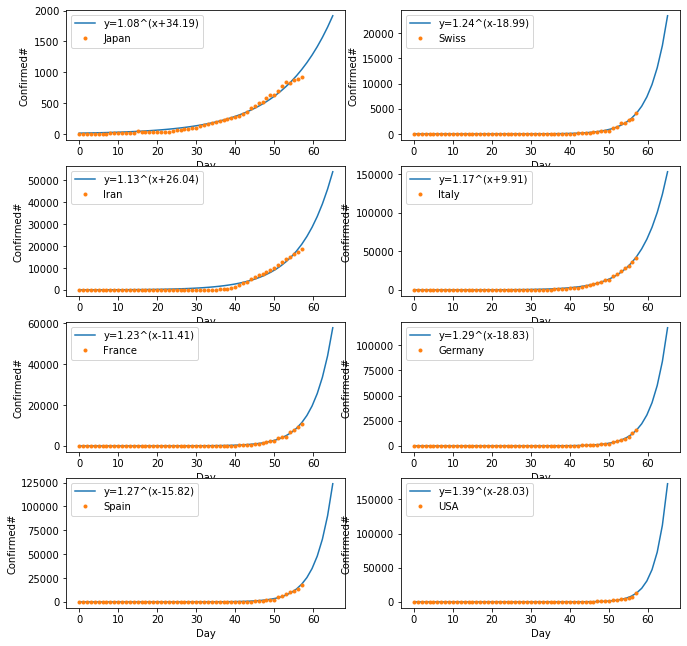

In [9]:
plt.figure(figsize=(11, 11))

_data = confirmed_sum_jpn

xpoints = np.linspace(0, len(_data)+7)

param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
plt.subplot(421)
plt.plot(xpoints, nonlinear_fit(xpoints, param[0], param[1]), 
         label="y={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))
plt.plot([_ for _ in range(len(_data))], _data, ".", label="Japan")
plt.xlabel("Day")
plt.ylabel("Confirmed#")
plt.legend()
# plt.suptitle("Japan")

# _data = confirmed_sum_kr
# param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
# plt.subplot(422)
# plt.plot(xpoints, nonlinear_fit(xpoints, param[0], param[1]), 
#          label="y={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))
# plt.plot([_ for _ in range(len(_data))], _data, ".", label="South Korea")
# plt.xlabel("Day")
# plt.ylabel("Confirmed#")
# plt.legend()

_data = confirmed_sum_sw
param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
plt.subplot(422)
plt.plot(xpoints, nonlinear_fit(xpoints, param[0], param[1]), 
         label="y={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))
plt.plot([_ for _ in range(len(_data))], _data, ".", label="Swiss")
plt.xlabel("Day")
plt.ylabel("Confirmed#")
plt.legend()

_data = confirmed_sum_ir
param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
plt.subplot(423)
plt.plot(xpoints, nonlinear_fit(xpoints, param[0], param[1]), 
         label="y={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))
plt.plot([_ for _ in range(len(_data))], _data, ".", label="Iran")
plt.xlabel("Day")
plt.ylabel("Confirmed#")
plt.legend()

_data = confirmed_sum_it
param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
plt.subplot(424)
plt.plot(xpoints, nonlinear_fit(xpoints, param[0], param[1]), 
         label="y={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))
plt.plot([_ for _ in range(len(_data))], _data, ".", label="Italy")
plt.xlabel("Day")
plt.ylabel("Confirmed#")
plt.legend()

_data = confirmed_sum_fr
param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
plt.subplot(425)
plt.plot(xpoints, nonlinear_fit(xpoints, param[0], param[1]), 
         label="y={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))
plt.plot([_ for _ in range(len(_data))], _data, ".", label="France")
plt.xlabel("Day")
plt.ylabel("Confirmed#")
plt.legend()

_data = confirmed_sum_ger
param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
plt.subplot(426)
plt.plot(xpoints, nonlinear_fit(xpoints, param[0], param[1]), 
         label="y={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))
plt.plot([_ for _ in range(len(_data))], _data, ".", label="Germany")
plt.xlabel("Day")
plt.ylabel("Confirmed#")
plt.legend()

_data = confirmed_sum_sp
param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
plt.subplot(427)
plt.plot(xpoints, nonlinear_fit(xpoints, param[0], param[1]), 
         label="y={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))
plt.plot([_ for _ in range(len(_data))], _data, ".", label="Spain")
plt.xlabel("Day")
plt.ylabel("Confirmed#")
plt.legend()

_data = confirmed_sum_us
param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
plt.subplot(428)
plt.plot(xpoints, nonlinear_fit(xpoints, param[0], param[1]), 
         label="y={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))
plt.plot([_ for _ in range(len(_data))], _data, ".", label="USA")
plt.xlabel("Day")
plt.ylabel("Confirmed#")
plt.legend()
# plt.suptitle("Japan")
plt.savefig("global.png", bbox_inches='tight', pad_inches=0.1)

Day 1 2020-02-28 00:00:00 34 21
Day 2 2020-02-29 00:00:00 44 29
Day 3 2020-03-01 00:00:00 56 34
Day 4 2020-03-02 00:00:00 73 52
Day 5 2020-03-03 00:00:00 95 79
Day 6 2020-03-04 00:00:00 123 107
Day 7 2020-03-05 00:00:00 159 148
Day 8 2020-03-06 00:00:00 205 197
Day 9 2020-03-07 00:00:00 265 233
Day 10 2020-03-08 00:00:00 343 366
Day 11 2020-03-09 00:00:00 443 463
Day 12 2020-03-10 00:00:00 573 631
Day 13 2020-03-11 00:00:00 741 827
Day 14 2020-03-12 00:00:00 958 827
Day 15 2020-03-13 00:00:00 1238 1266
Day 16 2020-03-14 00:00:00 1601 N/A
Day 17 2020-03-15 00:00:00 2069 N/A
Day 18 2020-03-16 00:00:00 2674 N/A
Day 19 2020-03-17 00:00:00 3457 N/A
Day 20 2020-03-18 00:00:00 4468 N/A
Day 21 2020-03-19 00:00:00 5775 N/A
Day 22 2020-03-20 00:00:00 7465 N/A
Day 23 2020-03-21 00:00:00 9649 N/A
Day 24 2020-03-22 00:00:00 12471 N/A
Day 25 2020-03-23 00:00:00 16120 N/A
Day 26 2020-03-24 00:00:00 20835 N/A
Day 27 2020-03-25 00:00:00 26930 N/A
Day 28 2020-03-26 00:00:00 34808 N/A
Day 29 2020-03-27 0

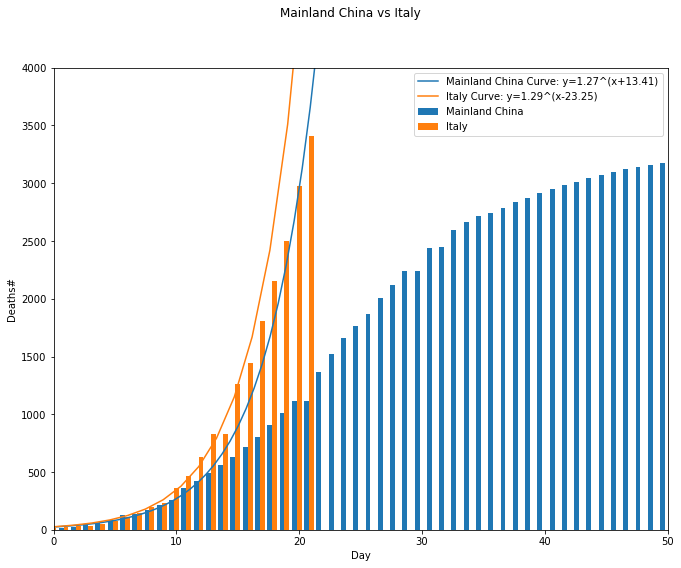

In [19]:
days_future = 19


# _data = confirmed_sum_mc
_data = deaths_sum_mc[:13]
xpoints = np.linspace(0, len(_data)+days_future)

param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
plt.figure(figsize=(11, 8.5))
plt.plot(xpoints, nonlinear_fit(xpoints, param[0], param[1]), 
         label="Mainland China Curve: y={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))
# plt.plot([_ for _ in range(len(deaths_sum_mc))], deaths_sum_mc, ".", label="Mainland China")
plt.bar([_-0.4 for _ in range(len(deaths_sum_mc))], deaths_sum_mc, label="Mainland China", width=0.4)
plt.ylim(0, 4000)

plt.xlabel("Day")
plt.ylabel("Deaths#")
# _data.index = pandas.to_datetime(_data.index)
# for num, _ in enumerate(nonlinear_fit(range(len(_data)+days_future), param[0], param[1])):
#     if num < len(_data):
#         print("Day {}".format(num), _data.index[0]+pandas.Timedelta(days=num), int(_), _data[num])
#     else:
#         print("Day {}".format(num), _data.index[0]+pandas.Timedelta(days=num), int(_), "N/A")

delay_from_china = 36

_data = deaths_sum_it[:16+delay_from_china]

# param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
# plt.plot([_-35 for _ in range(len(_data))], _data, ">", label="Italy")
plt.bar([_-delay_from_china for _ in range(len(deaths_sum_it))], deaths_sum_it, label="Italy", width=0.4)


xpoints = np.linspace(0, len(_data)+days_future)

param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
plt.plot(xpoints-delay_from_china, nonlinear_fit(xpoints, param[0], param[1]), 
         label="Italy Curve: y={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))


# _data.index = pandas.to_datetime(_data.index)
# for _ in range(20):
#     print(_, int(nonlinear_fit(_+36, param[0], param[1])))
_data.index = pandas.to_datetime(_data.index)
for num, _ in enumerate(nonlinear_fit(range(len(_data)+days_future), param[0], param[1])):
    if num-delay_from_china > 0:
        if num < len(_data):
            print("Day {}".format(num-36), _data.index[0]+pandas.Timedelta(days=num), int(_), _data[num])
        else:
            print("Day {}".format(num-36), _data.index[0]+pandas.Timedelta(days=num), int(_), "N/A")

plt.xlim(0, 50)
plt.legend()
plt.suptitle("Mainland China vs Italy")
plt.savefig("it_vs_mc.png", tight_layout=True, bbox_inches='tight', pad_inches=0)

Day 10 2020-03-08 00:00:00 31 17
Day 11 2020-03-09 00:00:00 42 28
Day 12 2020-03-10 00:00:00 56 35
Day 13 2020-03-11 00:00:00 76 54
Day 14 2020-03-12 00:00:00 103 55
Day 15 2020-03-13 00:00:00 140 133
Day 16 2020-03-14 00:00:00 189 195
Day 17 2020-03-15 00:00:00 256 289
Day 18 2020-03-16 00:00:00 346 342
Day 19 2020-03-17 00:00:00 468 533
Day 20 2020-03-18 00:00:00 632 623
Day 21 2020-03-19 00:00:00 854 830
Day 22 2020-03-20 00:00:00 1155 N/A
Day 23 2020-03-21 00:00:00 1560 N/A
Day 24 2020-03-22 00:00:00 2109 N/A
Day 25 2020-03-23 00:00:00 2850 N/A
Day 26 2020-03-24 00:00:00 3851 N/A
Day 27 2020-03-25 00:00:00 5204 N/A
Day 28 2020-03-26 00:00:00 7033 N/A
Day 29 2020-03-27 00:00:00 9503 N/A
Day 30 2020-03-28 00:00:00 12842 N/A
Day 31 2020-03-29 00:00:00 17354 N/A
Day 32 2020-03-30 00:00:00 23451 N/A
Day 33 2020-03-31 00:00:00 31690 N/A
Day 34 2020-04-01 00:00:00 42823 N/A
Day 35 2020-04-02 00:00:00 57867 N/A
Day 36 2020-04-03 00:00:00 78196 N/A
Day 37 2020-04-04 00:00:00 105668 N/A
Day 

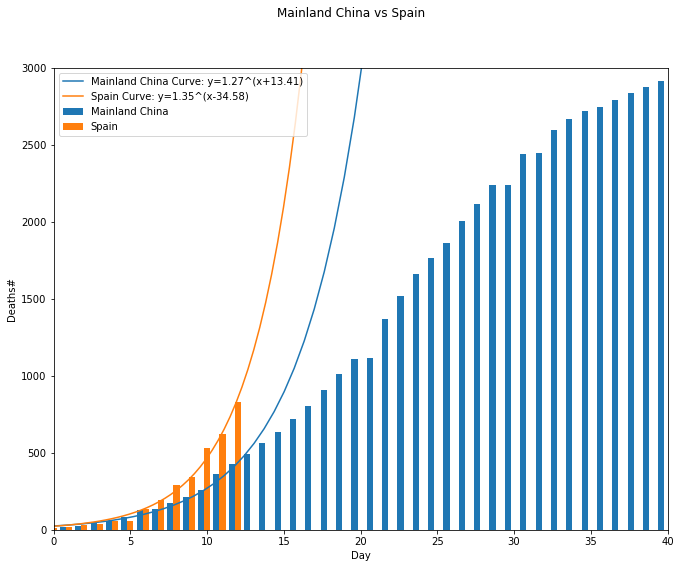

In [18]:
days_future = 19


# _data = confirmed_sum_mc
_data = deaths_sum_mc[:13]
xpoints = np.linspace(0, len(_data)+days_future)

param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
plt.figure(figsize=(11, 8.5))
plt.plot(xpoints, nonlinear_fit(xpoints, param[0], param[1]), 
         label="Mainland China Curve: y={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))
# plt.plot([_ for _ in range(len(deaths_sum_mc))], deaths_sum_mc, ".", label="Mainland China")
plt.bar([_-0.4 for _ in range(len(deaths_sum_mc))], deaths_sum_mc, label="Mainland China", width=0.4)
plt.ylim(0, 3000)

plt.xlabel("Day")
plt.ylabel("Deaths#")
# _data.index = pandas.to_datetime(_data.index)
# for num, _ in enumerate(nonlinear_fit(range(len(_data)+days_future), param[0], param[1])):
#     if num < len(_data):
#         print("Day {}".format(num), _data.index[0]+pandas.Timedelta(days=num), int(_), _data[num])
#     else:
#         print("Day {}".format(num), _data.index[0]+pandas.Timedelta(days=num), int(_), "N/A")

delay_from_china = 45

_data = deaths_sum_sp

param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
# plt.plot([_-35 for _ in range(len(_data))], _data, ">", label="Italy")
plt.bar([_-delay_from_china for _ in range(len(_data))], _data, label="Spain", width=0.4)


xpoints = np.linspace(0, len(_data)+days_future, 200)

param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
plt.plot(xpoints-delay_from_china, nonlinear_fit(xpoints, param[0], param[1]), 
         label="Spain Curve: y={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))


# _data.index = pandas.to_datetime(_data.index)
# for _ in range(20):
#     print(_, int(nonlinear_fit(_+36, param[0], param[1])))
_data.index = pandas.to_datetime(_data.index)
for num, _ in enumerate(nonlinear_fit(range(len(_data)+days_future), param[0], param[1])):
    if num-delay_from_china > 0:
        if num < len(_data):
            print("Day {}".format(num-36), _data.index[0]+pandas.Timedelta(days=num), int(_), _data[num])
        else:
            print("Day {}".format(num-36), _data.index[0]+pandas.Timedelta(days=num), int(_), "N/A")

plt.xlim(0, 40)
plt.legend()
plt.suptitle("Mainland China vs Spain")
plt.savefig("sp_vs_mc.png", tight_layout=True, bbox_inches='tight', pad_inches=0)

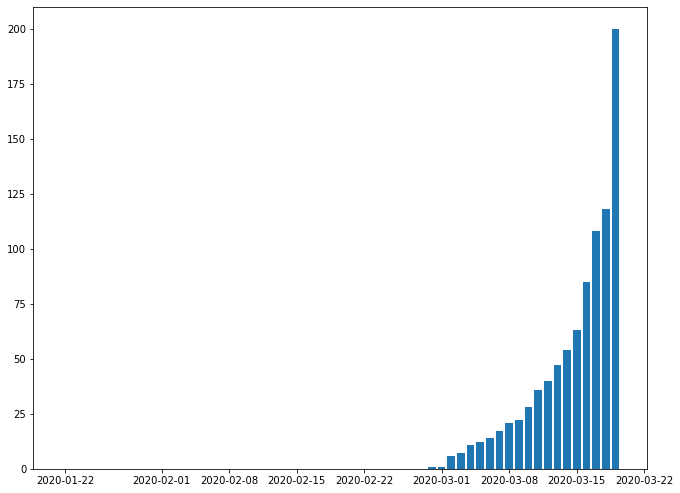

In [12]:
plt.figure(figsize=(11, 8.5))

_data = deaths_sum_us

_data.index = pandas.to_datetime(_data.index)
param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
plt.bar(_data.index, _data, label="US", width=0.8)


xpoints = np.linspace(0, len(_data)+days_future, 200)

# param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
# plt.plot(xpoints, nonlinear_fit(xpoints, param[0], param[1]), 
#          label="Spain Curve: y={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))


<BarContainer object of 57 artists>

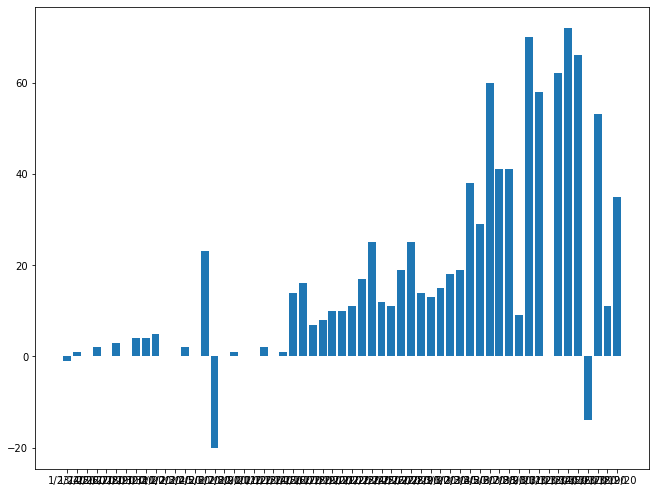

In [13]:
plt.figure(figsize=(11, 8.5))

plt.bar(confirmed_sum_jpn.index[1:], np.diff(confirmed_sum_jpn), label="Japan", width=0.8)

<BarContainer object of 57 artists>

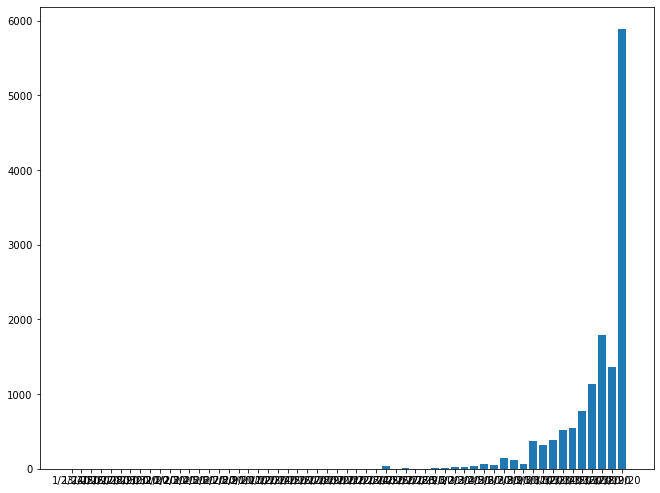

In [14]:
plt.figure(figsize=(11, 8.5))

plt.bar(confirmed_sum_us.index[1:], np.diff(confirmed_sum_us), label="Japan", width=0.8)

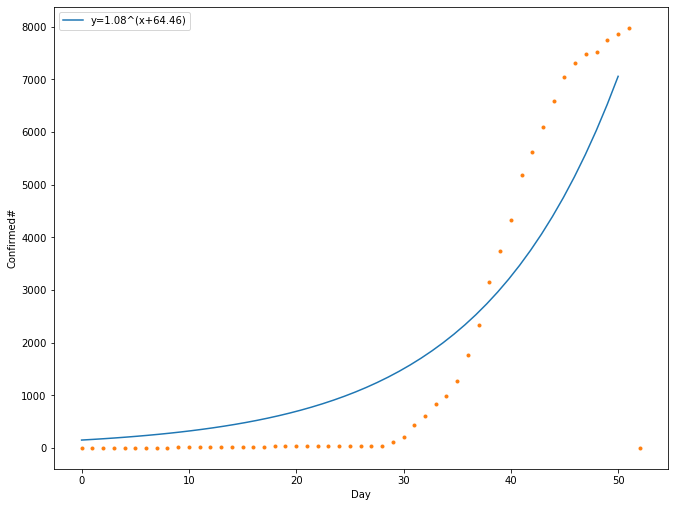

In [24]:
xpoints = np.linspace(0, 50)

_data = confirmed_sum_kr

param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
plt.figure(figsize=(11, 8.5))
plt.plot(xpoints, nonlinear_fit(xpoints, param[0], param[1]), 
         label="y={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))
plt.plot([_ for _ in range(len(_data))], _data, ".")
plt.xlabel("Day")
plt.ylabel("Confirmed#")
plt.legend()

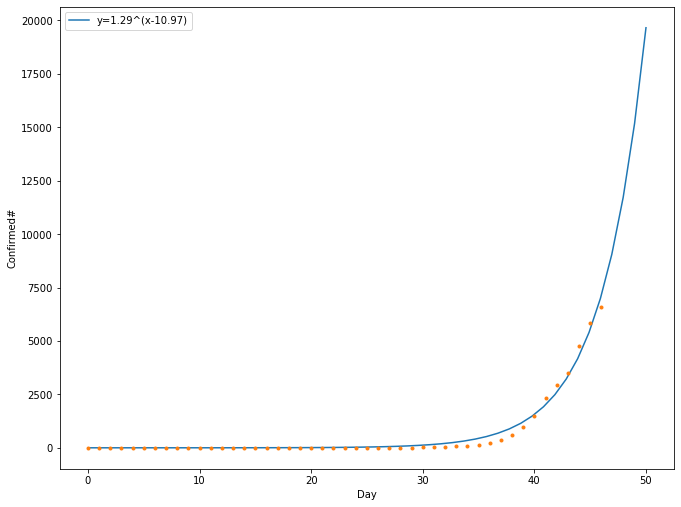

In [125]:
xpoints = np.linspace(0, 50)

_data = confirmed_sum_ir

param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
plt.figure(figsize=(11, 8.5))
plt.plot(xpoints, nonlinear_fit(xpoints, param[0], param[1]), 
         label="y={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))
plt.plot([_ for _ in range(len(_data))], _data, ".")
plt.xlabel("Day")
plt.ylabel("Confirmed#")
plt.legend()

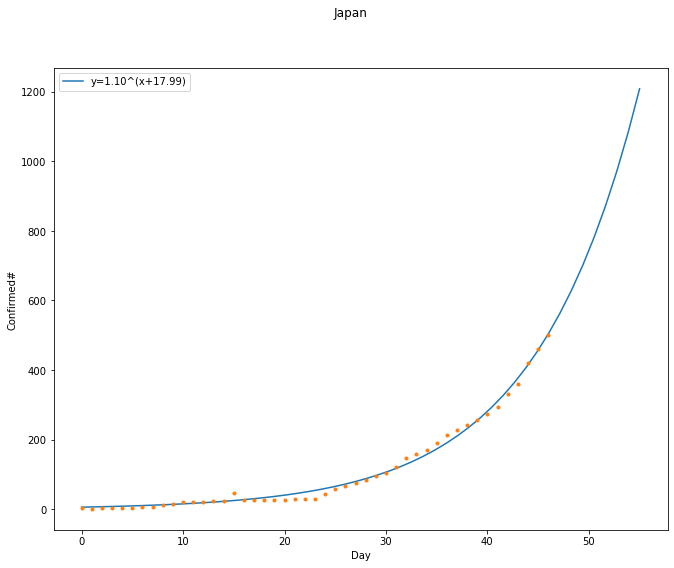

In [126]:
xpoints = np.linspace(0, 55)

_data = confirmed_sum_jpn

param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
plt.figure(figsize=(11, 8.5))
plt.plot(xpoints, nonlinear_fit(xpoints, param[0], param[1]), 
         label="y={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))
plt.plot([_ for _ in range(len(_data))], _data, ".")
plt.xlabel("Day")
plt.ylabel("Confirmed#")
plt.legend()
plt.suptitle("Japan")
plt.savefig("jpn.png")

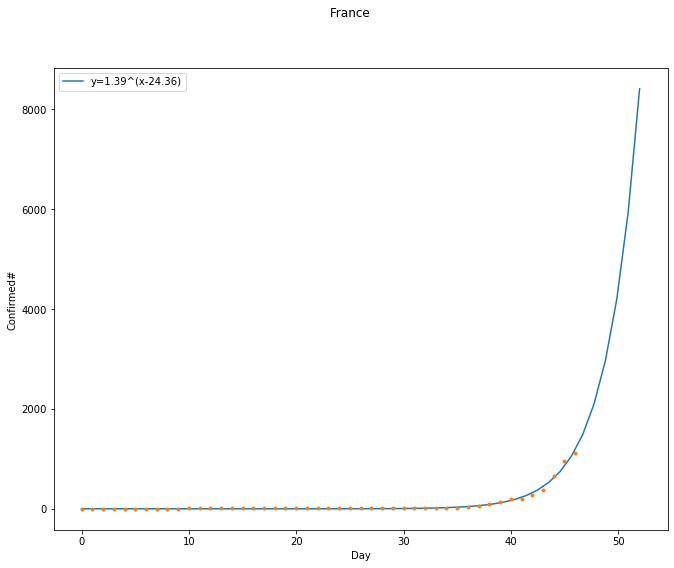

In [127]:
xpoints = np.linspace(0, 52)

_data = confirmed_sum_fr

param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
plt.figure(figsize=(11, 8.5))
plt.plot(xpoints, nonlinear_fit(xpoints, param[0], param[1]), 
         label="y={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))
plt.plot([_ for _ in range(len(_data))], _data, ".")
plt.xlabel("Day")
plt.ylabel("Confirmed#")
plt.legend()
plt.suptitle("France")
plt.savefig("fr.png")

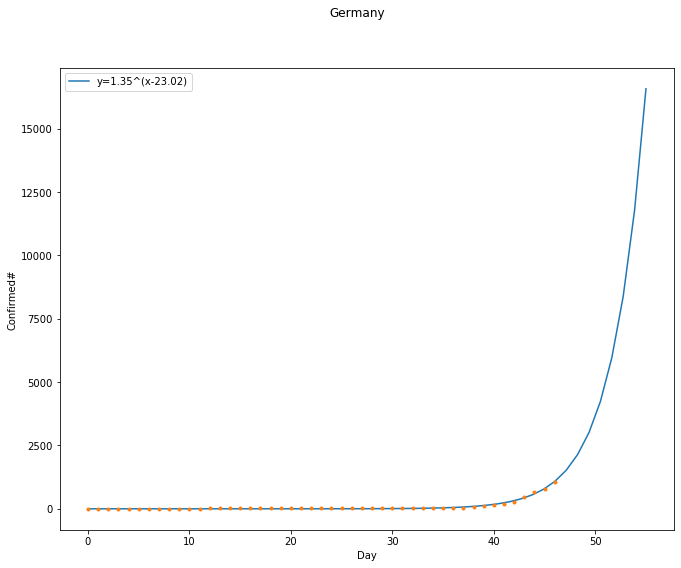

In [128]:
xpoints = np.linspace(0, 55)

_data = confirmed_sum_ger

param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
plt.figure(figsize=(11, 8.5))
plt.plot(xpoints, nonlinear_fit(xpoints, param[0], param[1]), 
         label="y={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))
plt.plot([_ for _ in range(len(_data))], _data, ".")
plt.xlabel("Day")
plt.ylabel("Confirmed#")
plt.legend()
plt.suptitle("Germany")
plt.savefig("ger.png")

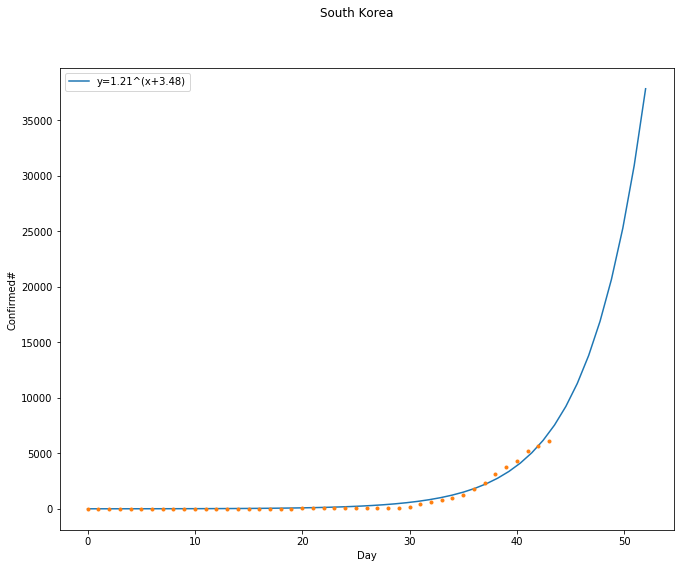

In [167]:
xpoints = np.linspace(0, 52)

_data = confirmed_sum_kr

param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
plt.figure(figsize=(11, 8.5))
plt.plot(xpoints, nonlinear_fit(xpoints, param[0], param[1]), 
         label="y={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))
plt.plot([_ for _ in range(len(_data))], _data, ".")
plt.xlabel("Day")
plt.ylabel("Confirmed#")
plt.legend()
plt.suptitle("South Korea")
plt.savefig("kr.png")

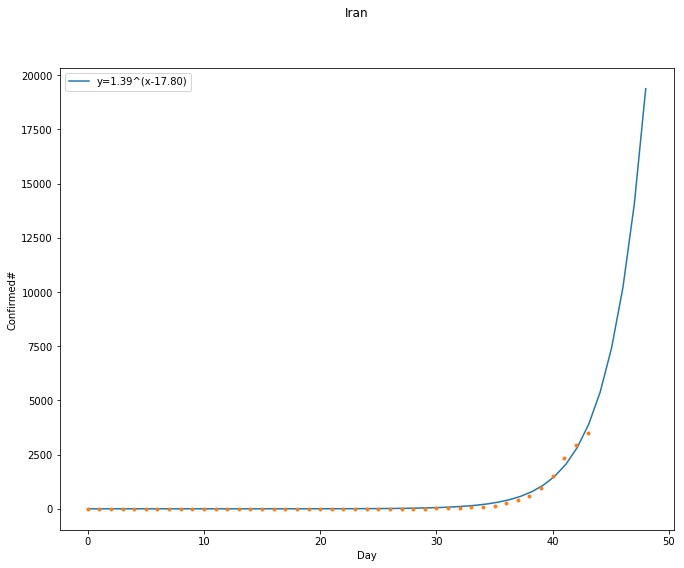

In [164]:
xpoints = np.linspace(0, 48)

_data = confirmed_sum_ir

param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
plt.figure(figsize=(11, 8.5))
plt.plot(xpoints, nonlinear_fit(xpoints, param[0], param[1]), 
         label="y={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))
plt.plot([_ for _ in range(len(_data))], _data, ".")
plt.xlabel("Day")
plt.ylabel("Confirmed#")
plt.legend()
plt.suptitle("Iran")
plt.savefig("ir.png")

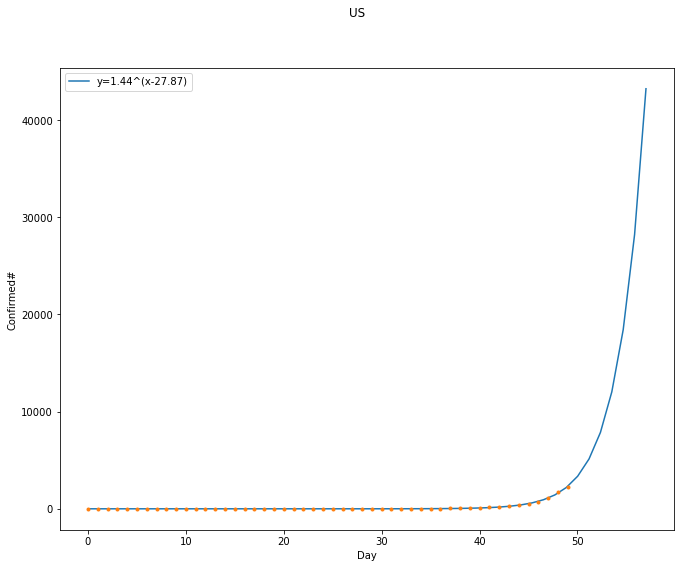

In [232]:
xpoints = np.linspace(0, len(_data)+7)

_data = confirmed_sum_us

param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
plt.figure(figsize=(11, 8.5))
plt.plot(xpoints, nonlinear_fit(xpoints, param[0], param[1]), 
         label="y={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))
plt.plot([_ for _ in range(len(_data))], _data, ".")
plt.xlabel("Day")
plt.ylabel("Confirmed#")
plt.legend()
plt.suptitle("US")
plt.savefig("us.png")

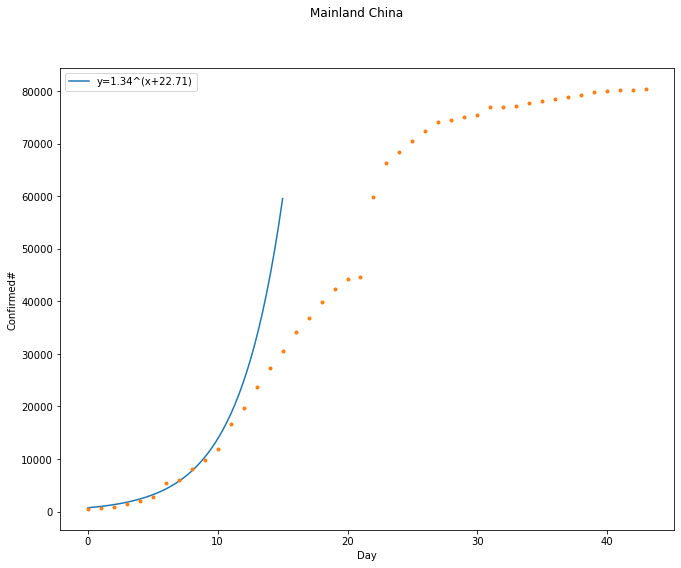

In [24]:
xpoints = np.linspace(0, 15)

_data = confirmed_sum_mc[0:10]

param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
plt.figure(figsize=(11, 8.5))
plt.plot(xpoints, nonlinear_fit(xpoints, param[0], param[1]), 
         label="y={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))
plt.plot([_ for _ in range(len(confirmed_sum_mc))], confirmed_sum_mc, ".")
plt.xlabel("Day")
plt.ylabel("Confirmed#")
plt.legend()
plt.suptitle("Mainland China")
plt.savefig("mainland china.png")

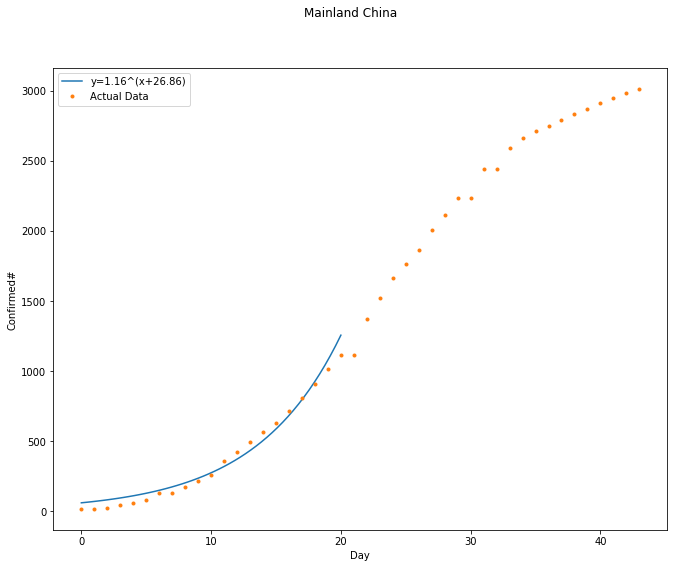

In [132]:
xpoints = np.linspace(0, 20)

_data = deaths_sum_mc[0:20]

param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
plt.figure(figsize=(11, 8.5))
plt.plot(xpoints, nonlinear_fit(xpoints, param[0], param[1]), 
         label="y={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))
plt.plot([_ for _ in range(len(deaths_sum_mc))], deaths_sum_mc, ".", label="Actual Data")
plt.xlabel("Day")
plt.ylabel("Confirmed#")
plt.legend()
plt.suptitle("Mainland China")
plt.savefig("mainland china.png")

2020-01-22 00:00:00 0 0
2020-01-23 00:00:00 0 0
2020-01-24 00:00:00 0 0
2020-01-25 00:00:00 0 0
2020-01-26 00:00:00 0 0
2020-01-27 00:00:00 0 0
2020-01-28 00:00:00 0 0
2020-01-29 00:00:00 0 0
2020-01-30 00:00:00 0 0
2020-01-31 00:00:00 0 2
2020-02-01 00:00:00 1 2
2020-02-02 00:00:00 1 2
2020-02-03 00:00:00 1 2
2020-02-04 00:00:00 2 2
2020-02-05 00:00:00 2 2
2020-02-06 00:00:00 3 2
2020-02-07 00:00:00 4 3
2020-02-08 00:00:00 5 3
2020-02-09 00:00:00 7 3
2020-02-10 00:00:00 9 3
2020-02-11 00:00:00 12 3
2020-02-12 00:00:00 15 3
2020-02-13 00:00:00 20 3
2020-02-14 00:00:00 26 3
2020-02-15 00:00:00 33 3
2020-02-16 00:00:00 43 3
2020-02-17 00:00:00 55 3
2020-02-18 00:00:00 71 3
2020-02-19 00:00:00 92 3
2020-02-20 00:00:00 118 3
2020-02-21 00:00:00 152 20
2020-02-22 00:00:00 196 62
2020-02-23 00:00:00 252 155
2020-02-24 00:00:00 324 229
2020-02-25 00:00:00 416 322
2020-02-26 00:00:00 535 453
2020-02-27 00:00:00 688 655
2020-02-28 00:00:00 885 888
2020-02-29 00:00:00 1137 1128
2020-03-01 00:00:

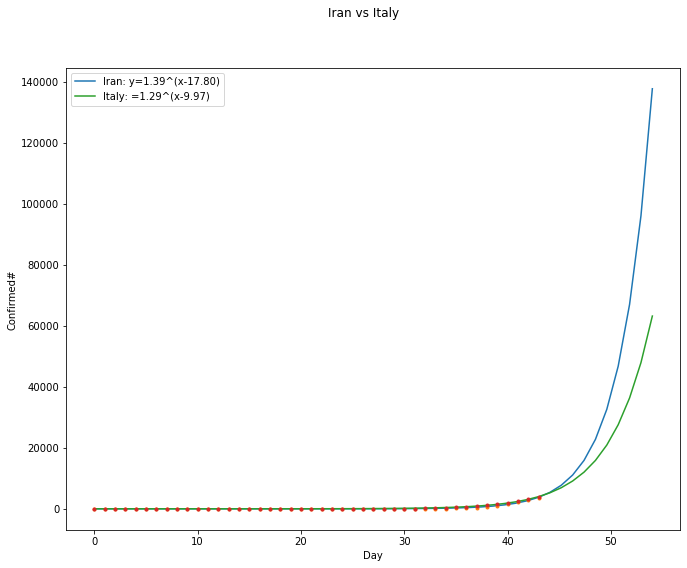

In [47]:

_data = confirmed_sum_ir
xpoints = np.linspace(0, len(_data)+10)

param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
plt.figure(figsize=(11, 8.5))
plt.plot(xpoints, nonlinear_fit(xpoints, param[0], param[1]), 
         label="Iran: y={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))
plt.plot([_ for _ in range(len(_data))], _data, ".")

_data = confirmed_sum_it

param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
# plt.figure(figsize=(11, 8.5))
plt.plot(xpoints, nonlinear_fit(xpoints, param[0], param[1]), 
         label="Italy: ={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))
plt.plot([_ for _ in range(len(_data))], _data, ".")

plt.xlabel("Day")
plt.ylabel("Confirmed#")
plt.legend()
plt.suptitle("Iran vs Italy")
# plt.savefig("ir.png")
_data.index = pandas.to_datetime(_data.index)
for num, _ in enumerate(nonlinear_fit(range(len(_data)+20), param[0], param[1])):
    if num < len(_data):
        print(_data.index[0]+pandas.Timedelta(days=num), int(_), _data[num])
    else:
        print(_data.index[0]+pandas.Timedelta(days=num), int(_), "N/A")
        

2020-01-22 00:00:00 0 0
2020-01-23 00:00:00 0 0
2020-01-24 00:00:00 0 0
2020-01-25 00:00:00 0 0
2020-01-26 00:00:00 0 0
2020-01-27 00:00:00 0 0
2020-01-28 00:00:00 0 0
2020-01-29 00:00:00 0 0
2020-01-30 00:00:00 0 0
2020-01-31 00:00:00 0 0
2020-02-01 00:00:00 0 0
2020-02-02 00:00:00 0 0
2020-02-03 00:00:00 0 0
2020-02-04 00:00:00 0 0
2020-02-05 00:00:00 0 0
2020-02-06 00:00:00 0 0
2020-02-07 00:00:00 0 0
2020-02-08 00:00:00 0 0
2020-02-09 00:00:00 0 0
2020-02-10 00:00:00 0 0
2020-02-11 00:00:00 0 0
2020-02-12 00:00:00 0 0
2020-02-13 00:00:00 0 0
2020-02-14 00:00:00 0 0
2020-02-15 00:00:00 0 0
2020-02-16 00:00:00 0 0
2020-02-17 00:00:00 1 0
2020-02-18 00:00:00 1 0
2020-02-19 00:00:00 1 0
2020-02-20 00:00:00 2 0
2020-02-21 00:00:00 3 1
2020-02-22 00:00:00 4 2
2020-02-23 00:00:00 5 3
2020-02-24 00:00:00 7 7
2020-02-25 00:00:00 10 10
2020-02-26 00:00:00 13 12
2020-02-27 00:00:00 18 17
2020-02-28 00:00:00 24 21
2020-02-29 00:00:00 32 29
2020-03-01 00:00:00 43 34
2020-03-02 00:00:00 57 52
20

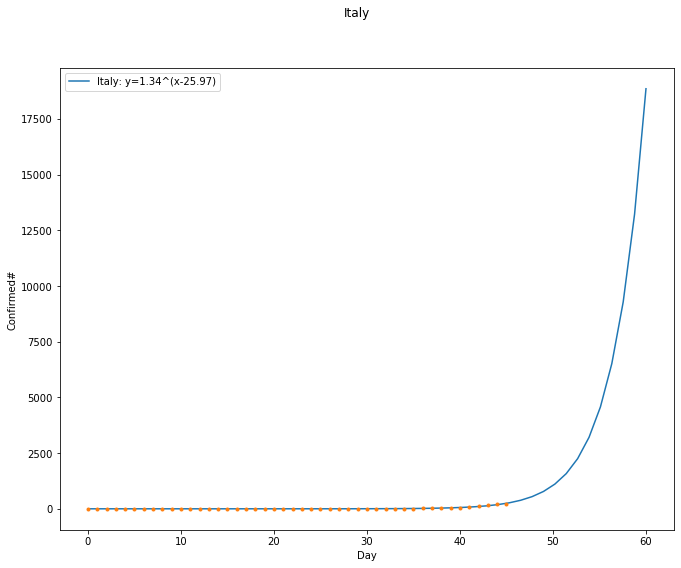

In [117]:
days_future = 14
xpoints = np.linspace(0, len(_data)+days_future)


# _data = confirmed_sum_it
_data = deaths_sum_it

param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
plt.figure(figsize=(11, 8.5))
plt.plot(xpoints, nonlinear_fit(xpoints, param[0], param[1]), 
         label="Italy: y={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))
plt.plot([_ for _ in range(len(_data))], _data, ".")

plt.xlabel("Day")
plt.ylabel("Confirmed#")
plt.legend()
plt.suptitle("Italy")
_data.index = pandas.to_datetime(_data.index)
for num, _ in enumerate(nonlinear_fit(range(len(_data)+days_future), param[0], param[1])):
    if num < len(_data):
        print(_data.index[0]+pandas.Timedelta(days=num), int(_), _data[num])
    else:
        print(_data.index[0]+pandas.Timedelta(days=num), int(_), "N/A")
        

In [248]:
_data

1/22/20    0.0
1/23/20    0.0
1/24/20    0.0
1/25/20    0.0
1/26/20    0.0
1/27/20    0.0
1/28/20    0.0
1/29/20    0.0
1/30/20    0.0
1/31/20    0.0
2/1/20     0.0
2/2/20     0.0
2/3/20     0.0
2/4/20     0.0
2/5/20     0.0
2/6/20     0.0
dtype: float64

Text(0.5, 0.98, 'Mainland China vs Italy')

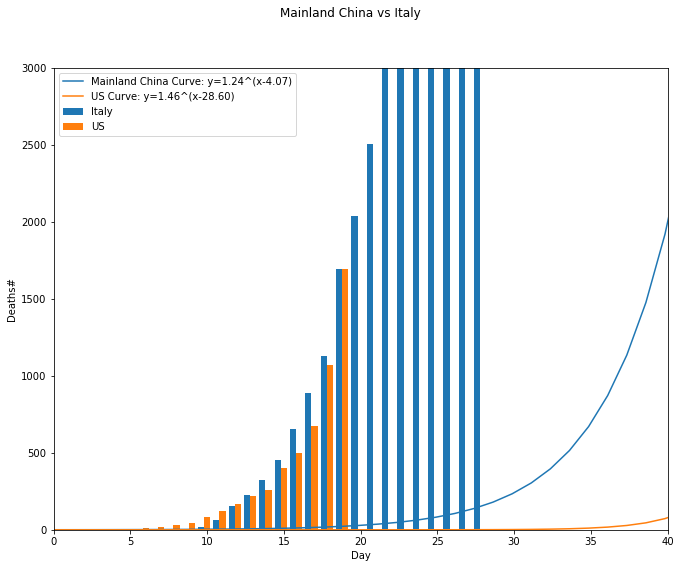

In [195]:
days_future = 12


# _data = confirmed_sum_mc
_data = confirmed_sum_it
xpoints = np.linspace(0, len(_data)+days_future)

param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
plt.figure(figsize=(11, 8.5))
plt.plot(xpoints, nonlinear_fit(xpoints, param[0], param[1]), 
         label="Mainland China Curve: y={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))
plt.bar([_-0.4-20 for _ in range(len(confirmed_sum_it))], confirmed_sum_it, label="Italy", width=0.4)
plt.ylim(0, 3000)

plt.xlabel("Day")
plt.ylabel("Deaths#")

_data = confirmed_sum_us

param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
plt.bar([_-29 for _ in range(len(_data))], _data, label="US", width=0.4)

xpoints = np.linspace(0, len(_data)+days_future)

param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
plt.plot(xpoints, nonlinear_fit(xpoints, param[0], param[1]), 
         label="US Curve: y={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))


plt.xlim(0, 40)
plt.legend()
plt.suptitle("Mainland China vs Italy")
# plt.savefig("it_vs_mc.png", tight_layout=True, bbox_inches='tight', pad_inches=0)

In [186]:
confirmed_sum_it

1/22/20        0
1/23/20        0
1/24/20        0
1/25/20        0
1/26/20        0
1/27/20        0
1/28/20        0
1/29/20        0
1/30/20        0
1/31/20        2
2/1/20         2
2/2/20         2
2/3/20         2
2/4/20         2
2/5/20         2
2/6/20         2
2/7/20         3
2/8/20         3
2/9/20         3
2/10/20        3
2/11/20        3
2/12/20        3
2/13/20        3
2/14/20        3
2/15/20        3
2/16/20        3
2/17/20        3
2/18/20        3
2/19/20        3
2/20/20        3
2/21/20       20
2/22/20       62
2/23/20      155
2/24/20      229
2/25/20      322
2/26/20      453
2/27/20      655
2/28/20      888
2/29/20     1128
3/1/20      1694
3/2/20      2036
3/3/20      2502
3/4/20      3089
3/5/20      3858
3/6/20      4636
3/7/20      5883
3/8/20      7375
3/9/20      9172
3/10/20    10149
dtype: object

Day 0 2020-01-22 00:00:00 24 17
Day 1 2020-01-23 00:00:00 31 18
Day 2 2020-01-24 00:00:00 39 26
Day 3 2020-01-25 00:00:00 50 42
Day 4 2020-01-26 00:00:00 64 56
Day 5 2020-01-27 00:00:00 81 82
Day 6 2020-01-28 00:00:00 103 131
Day 7 2020-01-29 00:00:00 131 133
Day 8 2020-01-30 00:00:00 167 171
Day 9 2020-01-31 00:00:00 212 213
Day 10 2020-02-01 00:00:00 270 259
Day 11 2020-02-02 00:00:00 343 361
Day 12 2020-02-03 00:00:00 435 425
Day 13 2020-02-04 00:00:00 553 N/A
Day 14 2020-02-05 00:00:00 703 N/A
Day 15 2020-02-06 00:00:00 892 N/A
Day 16 2020-02-07 00:00:00 1134 N/A
Day 17 2020-02-08 00:00:00 1440 N/A
Day 18 2020-02-09 00:00:00 1829 N/A
Day 19 2020-02-10 00:00:00 2324 N/A
Day 20 2020-02-11 00:00:00 2951 N/A
Day 21 2020-02-12 00:00:00 3749 N/A
Day 22 2020-02-13 00:00:00 4762 N/A
Day 23 2020-02-14 00:00:00 6049 N/A
Day 24 2020-02-15 00:00:00 7683 N/A


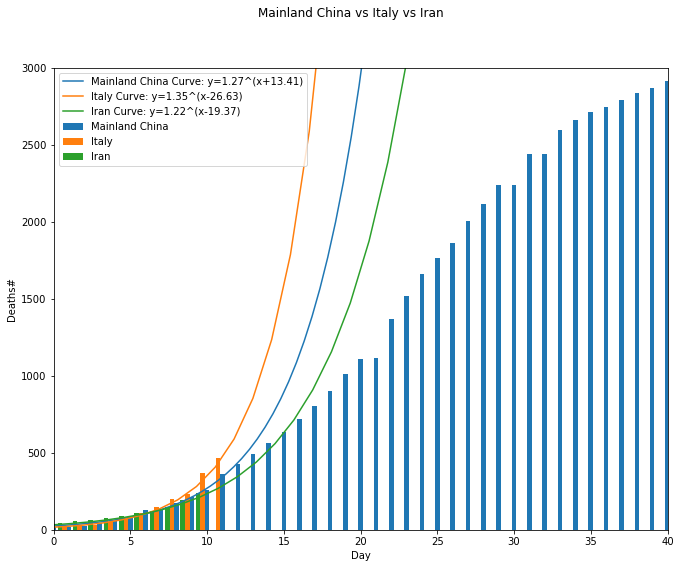

In [145]:
days_future = 12


# _data = confirmed_sum_mc
_data = deaths_sum_mc[:-35]
xpoints = np.linspace(0, len(_data)+days_future)

param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
plt.figure(figsize=(11, 8.5))
plt.plot(xpoints, nonlinear_fit(xpoints, param[0], param[1]), 
         label="Mainland China Curve: y={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))
# plt.plot([_ for _ in range(len(deaths_sum_mc))], deaths_sum_mc, ".", label="Mainland China")
plt.bar([_ for _ in range(len(deaths_sum_mc))], deaths_sum_mc, label="Mainland China", width=0.3)
plt.ylim(0, 3000)

plt.xlabel("Day")
plt.ylabel("Deaths#")
_data.index = pandas.to_datetime(_data.index)
for num, _ in enumerate(nonlinear_fit(range(len(_data)+days_future), param[0], param[1])):
    if num < len(_data):
        print("Day {}".format(num), _data.index[0]+pandas.Timedelta(days=num), int(_), _data[num])
    else:
        print("Day {}".format(num), _data.index[0]+pandas.Timedelta(days=num), int(_), "N/A")

_data = deaths_sum_it

param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
# plt.plot([_-35 for _ in range(len(_data))], _data, ">", label="Italy")
plt.bar([_-36-0.3 for _ in range(len(_data))], _data, label="Italy", width=0.3)


xpoints = np.linspace(0, len(_data)+days_future)

param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
plt.plot(xpoints-36, nonlinear_fit(xpoints, param[0], param[1]), 
         label="Italy Curve: y={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))

_data = deaths_sum_ir

param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
# plt.plot([_-35 for _ in range(len(_data))], _data, ">", label="Italy")
plt.bar([_-37-0.6 for _ in range(len(_data))], _data, label="Iran", width=0.3)


xpoints = np.linspace(0, len(_data)+days_future)

param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
plt.plot(xpoints-37, nonlinear_fit(xpoints, param[0], param[1]), 
         label="Iran Curve: y={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))

plt.xlim(0, 40)
plt.legend()
plt.suptitle("Mainland China vs Italy vs Iran")
plt.savefig("it_vs_mc_vs_iran.png", tight_layout=True, bbox_inches='tight', pad_inches=0)

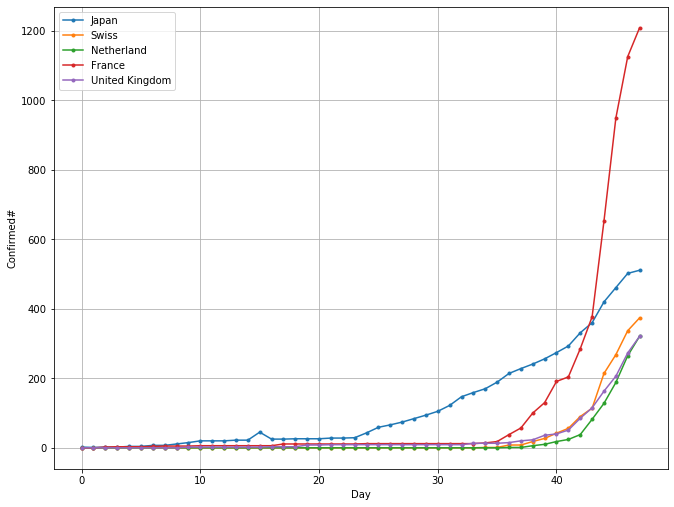

In [159]:
# xpoints = np.linspace(0, 55)


# param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
plt.figure(figsize=(11, 8.5))
# plt.plot(xpoints, nonlinear_fit(xpoints, param[0], param[1]), 
#          label="y={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))
_data = confirmed_sum_jpn
plt.plot([_ for _ in range(len(_data))], _data, ".-", label="Japan")
_data = confirmed_sum_sw
plt.plot([_ for _ in range(len(_data))], _data, ".-", label="Swiss")
_data = confirmed_sum_ne
plt.plot([_ for _ in range(len(_data))], _data, ".-", label="Netherland")
_data = confirmed_sum_fr
plt.plot([_ for _ in range(len(_data))], _data, ".-", label="France")
_data = confirmed_sum_uk
plt.plot([_ for _ in range(len(_data))], _data, ".-", label="United Kingdom")
plt.xlabel("Day")
plt.ylabel("Confirmed#")
plt.legend()
plt.grid()
# plt.suptitle("Japan")
# plt.savefig("jpn.png")

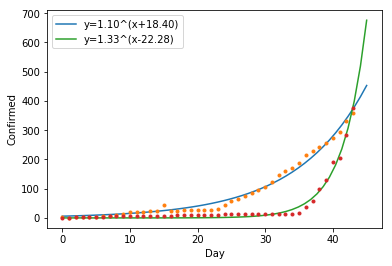

In [83]:
xpoints = np.linspace(0, 45)

param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(confirmed_sum_jpn))], np.array(confirmed_sum_jpn))
plt.plot(xpoints, nonlinear_fit(xpoints, param[0], param[1]), 
         label="y={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))
plt.plot([_ for _ in range(len(confirmed_sum_jpn))], confirmed_sum_jpn, ".")
param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(confirmed_sum_fr))], np.array(confirmed_sum_fr))
plt.plot(xpoints, nonlinear_fit(xpoints, param[0], param[1]), 
         label="y={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))
plt.plot([_ for _ in range(len(confirmed_sum_fr))], confirmed_sum_fr, ".")
plt.xlabel("Day")
plt.ylabel("Confirmed")
plt.legend()

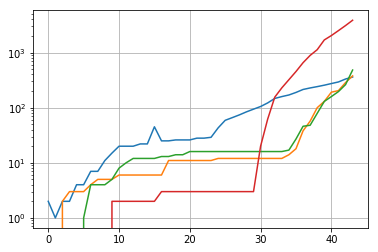

In [57]:
plt.plot(np.array(confirmed_sum_jpn, dtype=float))
plt.plot(np.array(confirmed_sum_fr, dtype=float))
plt.plot(np.array(confirmed_sum_ger, dtype=float))
plt.plot(np.array(confirmed_sum_it, dtype=float))
plt.yscale("log")
plt.grid()

In [161]:
confirmed[confirmed["Province/State"]=="King County, WA"]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20
35,"King County, WA",US,47.6062,-122.3321,1,1,1,1,1,1,...,1,1,1,6,9,14,21,31,51,58.0


In [162]:
confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20
0,Anhui,Mainland China,31.82570,117.2264,1,9,15,39,60,70,...,989,989,990,990,990,990,990,990,990,990.0
1,Beijing,Mainland China,40.18240,116.4142,14,22,36,41,68,80,...,400,410,410,411,413,414,414,418,418,422.0
2,Chongqing,Mainland China,30.05720,107.8740,6,9,27,57,75,110,...,576,576,576,576,576,576,576,576,576,576.0
3,Fujian,Mainland China,26.07890,117.9874,1,5,10,18,35,59,...,294,296,296,296,296,296,296,296,296,296.0
4,Gansu,Mainland China,36.06110,103.8343,0,2,2,4,7,14,...,91,91,91,91,91,91,91,91,102,119.0
5,Guangdong,Mainland China,23.34170,113.4244,26,32,53,78,111,151,...,1347,1347,1348,1349,1349,1350,1350,1350,1351,1352.0
6,Guangxi,Mainland China,23.82980,108.7881,2,5,23,23,36,46,...,252,252,252,252,252,252,252,252,252,252.0
7,Guizhou,Mainland China,26.81540,106.8748,1,3,3,4,5,7,...,146,146,146,146,146,146,146,146,146,146.0
8,Hainan,Mainland China,19.19590,109.7453,4,5,8,19,22,33,...,168,168,168,168,168,168,168,168,168,168.0
9,Hebei,Mainland China,38.04280,114.5149,1,1,2,8,13,18,...,312,317,318,318,318,318,318,318,318,318.0
